## **Import libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from numba import jit

## **Set computational condition and parameters**

In [2]:
nx = ny = 128
dx = dy = 1.0
total_step = 2000

dt = 1.0e-2
A = 2.0
mobility = 1.0
grad_coef = 1.0
c0 = 0.5

## **(option) Visualize chemical free energy**

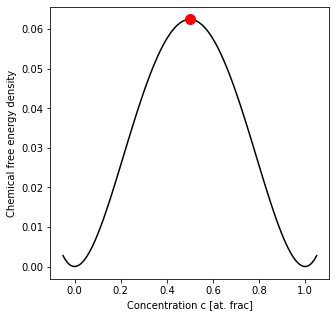

In [3]:
fig = plt.figure(figsize=(5,5))
cc = np.linspace(-0.05, 1.05, 100);
plt.plot(cc, cc**2*(1.-cc)**2 ,color='black')
plt.plot(c0, c0**2*(1.-c0)**2 ,color='r',marker='o',markersize=10)
plt.xlabel('Concentration c [at. frac]')
plt.ylabel('Chemical free energy density')
plt.show()

## **Declare Numpy arrays and set initial distribution of concentration**

In [4]:
con = np.zeros([nx, ny])
con_new = np.zeros([nx, ny])
con = c0 + 0.01 * (0.5 - np.random.rand(nx, ny))

## **(option) Visualize initial distribution**

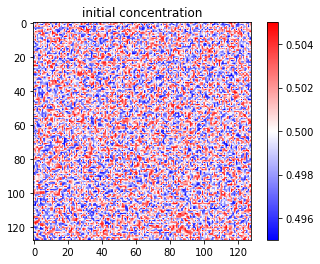

In [5]:
plt.imshow(con, cmap='bwr')
plt.title('initial concentration')
plt.colorbar()
plt.show() 

## **Define function to solve Cahn-Hilliard equation**

In [6]:
@jit(nopython=True)
def update(con, con_new):
  for j in range(ny):
    for i in range(nx):
      
      ip = i + 1
      im = i - 1
      jp = j + 1
      jm = j - 1
      ipp = i + 2
      imm = i - 2
      jpp = j + 2
      jmm = j - 2

      if ip > nx-1:
        ip = ip - nx
      if im < 0:
        im = im + nx
      if jp > ny-1:
        jp = jp - ny
      if jm < 0:
        jm = jm + ny
      if ipp > nx-1:
        ipp = ipp - nx
      if imm < 0:
        imm = imm + nx
      if jpp > ny-1:
        jpp = jpp - ny
      if jmm < 0:
        jmm = jmm + ny
      
      cc = con[i,j] # at (i,j) "centeral point"
      ce = con[ip,j] # at (i+1.j) "eastern point"
      cw = con[im,j] # at (i-1,j) "western point"
      cs = con[i,jm] # at (i,j-1) "southern point"
      cn = con[i,jp] # at (i,j+1) "northern point"
      cse = con[ip,jm] # at (i+1, j-1)
      cne = con[ip,jp]
      csw = con[im,jm]
      cnw = con[im,jp]
      cee = con[ipp,j]  # at (i+2, j)
      cww = con[imm,j]
      css = con[i,jmm]
      cnn = con[i,jpp]
      
      mu_chem_c = 2.*A*cc*(1.-cc)**2 - 2.*A*cc**2*(1.-cc) # chemical term of the diffusion potential
      mu_chem_w = 2.*A*cw*(1.-cw)**2 - 2.*A*cw**2*(1.-cw)  
      mu_chem_e = 2.*A*ce*(1.-ce)**2 - 2.*A*ce**2*(1.-ce) 
      mu_chem_n = 2.*A*cn*(1.-cn)**2 - 2.*A*cn**2*(1.-cn) 
      mu_chem_s = 2.*A*cs*(1.-cs)**2 - 2.*A*cs**2*(1.-cs)  
      
      mu_grad_c = -grad_coef*( (ce - 2.0*cc + cw)/dx/dx + (cn  - 2.0*cc + cs)/dy/dy) # gradient term of the diffusion potential
      mu_grad_w = -grad_coef*( (cc - 2.0*cw + cww)/dx/dx + (cnw - 2.0*cw + csw)/dy/dy)
      mu_grad_e = -grad_coef*( (cee - 2.0*ce + cc)/dx/dx + (cne - 2.0*ce + cse)/dy/dy)  
      mu_grad_n = -grad_coef*( (cne - 2.0*cn + cnw)/dx/dx + (cnn - 2.0*cn + cc)/dy/dy) 
      mu_grad_s = -grad_coef*( (cse - 2.0*cs + csw)/dx/dx + (cc  - 2.0*cs + css)/dy/dy)
      
      mu_c = mu_chem_c + mu_grad_c # total diffusion potental
      mu_w = mu_chem_w + mu_grad_w 
      mu_e = mu_chem_e + mu_grad_e 
      mu_n = mu_chem_n + mu_grad_n 
      mu_s = mu_chem_s + mu_grad_s
      
      laplace_mu = (mu_w - 2.0*mu_c + mu_e)/dx/dx + (mu_n - 2.0 *mu_c + mu_s)/dy/dy
      con_new[i,j] = con[i,j] + mobility*laplace_mu*dt  

## **Time integration**

nstep = 0


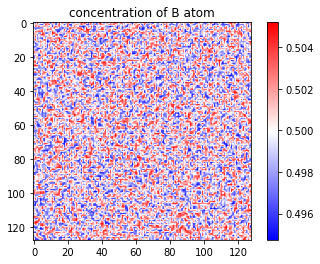

nstep = 100


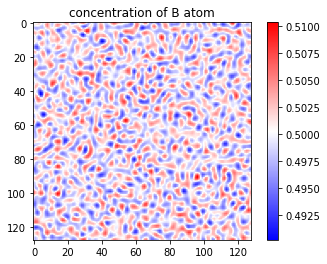

nstep = 200


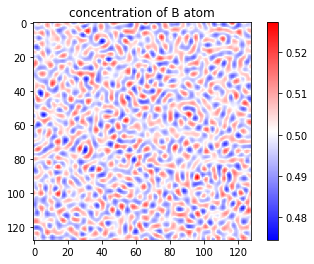

nstep = 300


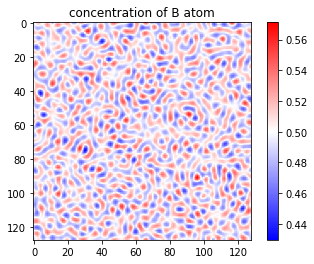

nstep = 400


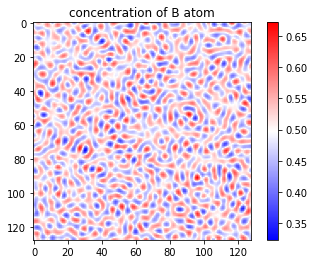

nstep = 500


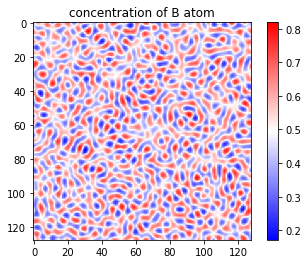

nstep = 600


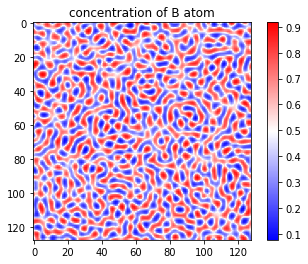

nstep = 700


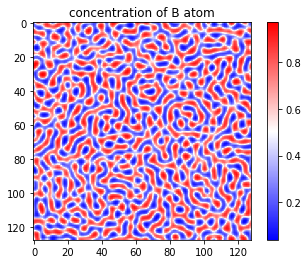

nstep = 800


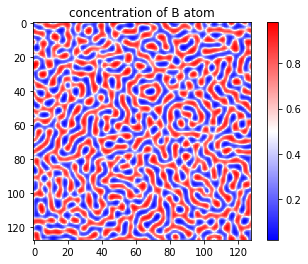

nstep = 900


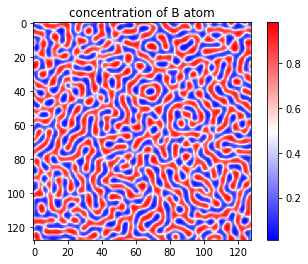

nstep = 1000


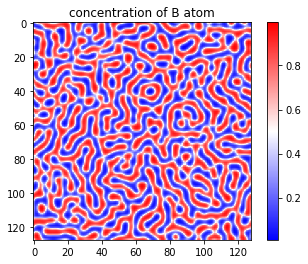

nstep = 1100


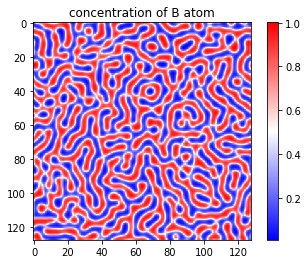

nstep = 1200


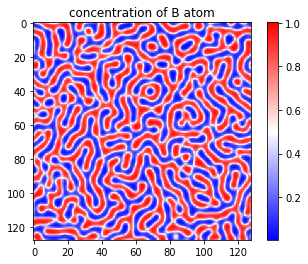

nstep = 1300


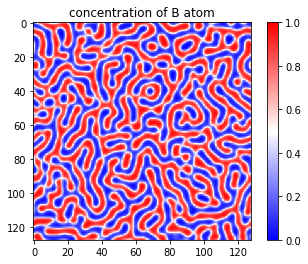

nstep = 1400


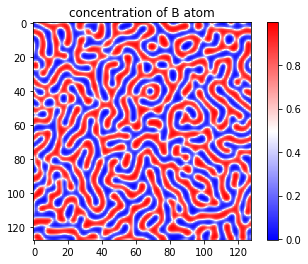

nstep = 1500


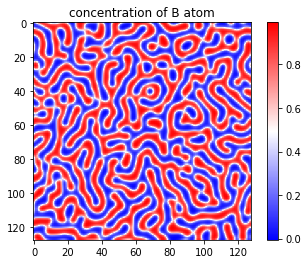

nstep = 1600


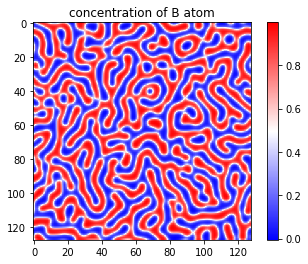

nstep = 1700


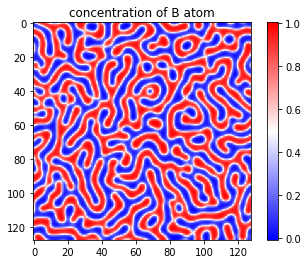

nstep = 1800


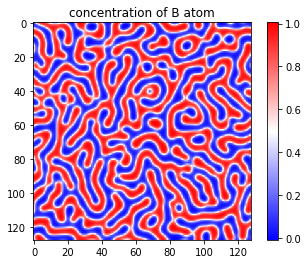

nstep = 1900


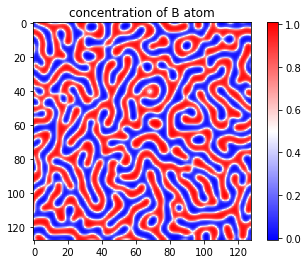

nstep = 2000


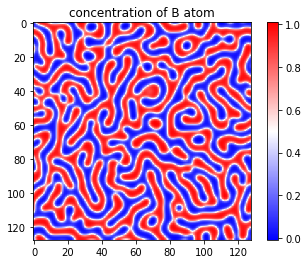

It takes  12728.611469268799 ms


In [7]:
start = time()
for nstep in range(total_step+1):
    update(con, con_new)
    con = con_new # swap c at time t and c at time t+dt

    if nstep % 100 == 0:
        print('nstep =', nstep)
        plt.imshow(con, cmap='bwr')
        plt.title('concentration of B atom')
        plt.colorbar()
        plt.show()
    
end = time()
print("It takes ", (end-start)*1000.0, "ms")